In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import pandas as pd
import psycopg2 as pg
import seaborn as sns
import matplotlib.pyplot as plt 

In [17]:
df = 'senate_model'
engine = pg.connect("dbname='postgres' user='postgres' host='elections.c8frdoyd7uok.us-east-2.rds.amazonaws.com' port='5432' password='Flowers89!'")
df = pd.read_sql(f'select * from {df}', con=engine)
df

,index,Unnamed: 0,_year,_state,state_po,state_fips,state_cen,state_ic,office,district,...,candidate,party_detailed,writein,_mode,candidatevotes,totalvotes,unofficial,_version,party_simplified,Results
0,0,0,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,SAM STEIGER,REPUBLICAN,False,total,321236,741210,False,20210114,REPUBLICAN,0
1,1,1,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,WM. MATHEWS FEIGHAN,INDEPENDENT,False,total,1565,741210,False,20210114,OTHER,0
2,2,2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT,1
3,3,3,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,ALLAN NORWITZ,LIBERTARIAN,False,total,7310,741210,False,20210114,LIBERTARIAN,0
4,4,4,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,BOB FIELD,INDEPENDENT,False,total,10765,741210,False,20210114,OTHER,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,3624,3009,2014,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,RICK WEILAND,DEMOCRAT,False,total,82456,279412,False,20210114,DEMOCRAT,0
3625,3625,3248,2016,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,JOHN R. THUNE,REPUBLICAN,False,total,265516,369656,False,20210114,REPUBLICAN,1
3626,3626,3249,2016,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,JAY WILLIAMS,DEMOCRAT,False,total,104140,369656,False,20210114,DEMOCRAT,0
3627,3627,3595,2020,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,MIKE ROUNDS,REPUBLICAN,False,total,276232,420219,True,20210114,REPUBLICAN,1


In [18]:
df = df.loc[df._year.isin([2020])]
df

,index,Unnamed: 0,_year,_state,state_po,state_fips,state_cen,state_ic,office,district,...,candidate,party_detailed,writein,_mode,candidatevotes,totalvotes,unofficial,_version,party_simplified,Results
80,80,3428,2020,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,EDWARD DAVIDA,REPUBLICAN,True,total,28,3355307,False,20210114,REPUBLICAN,0
81,81,3429,2020,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,MARTHA MCSALLY,REPUBLICAN,False,total,1637661,3355307,False,20210114,REPUBLICAN,0
82,82,3430,2020,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,JOHN SCHIESS,REPUBLICAN,True,total,92,3355307,False,20210114,REPUBLICAN,0
83,83,3431,2020,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,DEBBIE SIMMONS,REPUBLICAN,True,total,98,3355307,False,20210114,REPUBLICAN,0
84,84,3432,2020,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,"PATRICK ""PAT"" THOMAS",REPUBLICAN,True,total,29,3355307,False,20210114,REPUBLICAN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,3589,3592,2020,SOUTH CAROLINA,SC,45,57,48,US SENATE,statewide,...,LINDSEY GRAHAM,REPUBLICAN,False,total,1369137,2515104,False,20210114,REPUBLICAN,1
3590,3590,3593,2020,SOUTH CAROLINA,SC,45,57,48,US SENATE,statewide,...,JAIME HARRISON,DEMOCRAT,False,total,1110828,2515104,False,20210114,DEMOCRAT,0
3591,3591,3594,2020,SOUTH CAROLINA,SC,45,57,48,US SENATE,statewide,...,None,None,True,total,2294,2515104,False,20210114,OTHER,0
3627,3627,3595,2020,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,MIKE ROUNDS,REPUBLICAN,False,total,276232,420219,True,20210114,REPUBLICAN,1


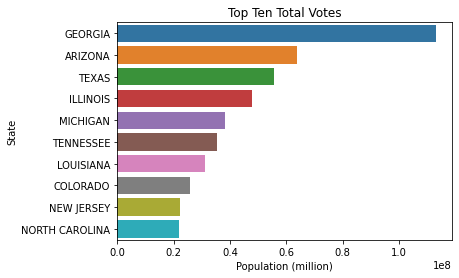

In [20]:
table_count = df.groupby(df['_state'])['totalvotes'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
y = table_count.index
x = table_count.values
ax = sns.barplot(x = x,y=y,orient='h')
plt.ylabel('State')
plt.xlabel('Population (million)')
ax.set_title("Top Ten Total Votes")
plt.show()